<a href="https://colab.research.google.com/github/Ruthnguli/EDA-and-Regression-Analysis/blob/main/RUTH_NGULI_DS_13_ML_IP_WEEK_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 2

## 1. Defining the Question

### a) Specifying the Question

Study the factors that affect housing prices and create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

The metric of success is to perform Exploratory Data Analysis to identify factors that affect housing prices  and identify the best regression model that can successfully predict 80% accurate the sale prices.

### c) Understanding the context 

Hass Consult is a Real Esatate company formed in 1992 with a vision to establish a comprehensive firms that reinvented the market patterns by introducing transparency, integrity and professionalism in a market calling for more global standards.

### d) Recording the Experimental Design

1. Loading dataset in colab note book
2. Studying and cleaning the dataset
3. Perform Exploratory Data Analysis
4. Create Regression models: Multiple Linear Regression, Quantile Regression, Ridge Regression, Lasso Regression and Elastic Net Regression and evaluate their performance. 

### e) Data Relevance

## 2. Reading the Data

In [837]:
# import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [838]:
# Loading the Dataset
# Dataset url = http://bit.ly/IndependentProjectWeek7Dataset
#
housing = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

## 3. Checking the Data

In [839]:
# Determining the no. of records in our dataset
#
housing.shape

(21613, 20)

This dataset has 21613 entries and 20 variables.

In [840]:
# Previewing the top of our dataset
#
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [841]:
# Previewing the bottom of our dataset
# 
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [842]:
# Checking whether each column has an appropriate datatype
#
housing.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [843]:
# checking the information of the dataset
# 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

Our dataset has appropriate data types with  5 float type and 15 interger type.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [844]:
# Aligning data and removing space

housing.columns = housing.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')
housing.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


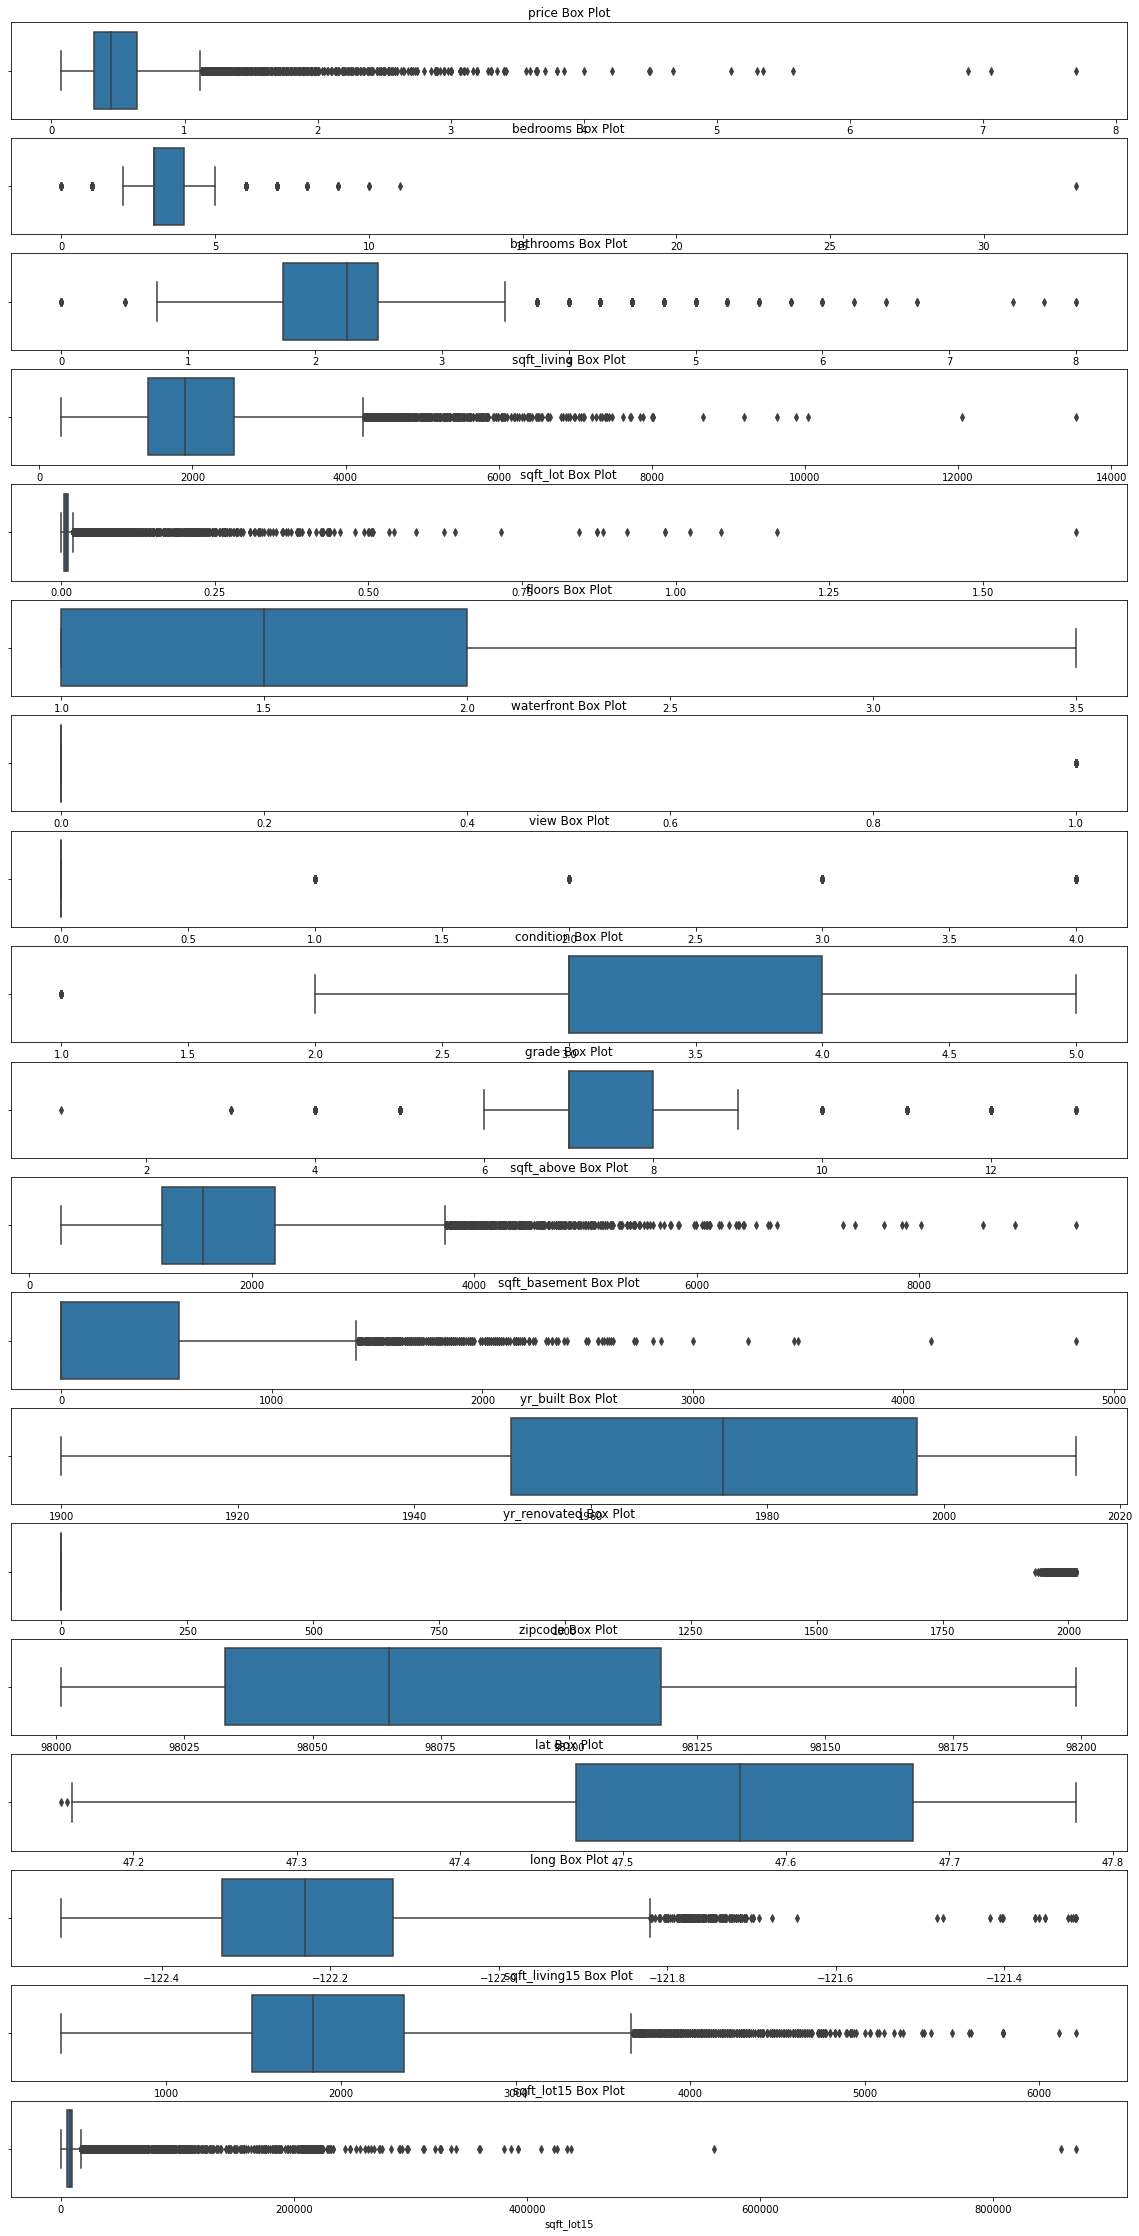

In [845]:
# Checking for Outliers
#
num_col = ['price',	'bedrooms', 'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'grade',
                 'sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'lat',	'long',	'sqft_living15',	'sqft_lot15']
fig,ax = plt.subplots(len(num_col),figsize = (20,40))

for i, col_val in enumerate (num_col):
  sns.boxplot(x=housing[col_val], ax=ax[i])
  ax[i].set_title('{} Box Plot'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

plt.show()

In [846]:
# Checking and dealing with outliers
#
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1
housing_out = housing[~((housing < (Q1 - 1.5 * IQR)) | (housing> (Q3 + 1.5 * IQR))).any(axis=1)]
print(housing)
print(housing_out)

               id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 columns]
               id     pri

In [847]:
# Identifying the Missing Data
#
housing_out.isna().values.any()

False

The dataset does not have any missing values.

In [848]:
# Identifying the duplicated Data
#

housing_out.duplicated().any()

True

The dataset has duplicated values.

In [849]:
# dealing with duplicated data
#
housing_out.drop_duplicates(keep='first', inplace=True)
housing_out.duplicated().any()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


False

In [850]:
# looking at the columns 
#
housing_out.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [851]:
# dropping columns that are not going to be used: id , latitude and longitude columns .
housing_out.drop(['id', 'lat', 'long'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [852]:
# checking if columns dropped
housing_out.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819


In [893]:
# Creating a cleaned and merged dataframe

housing_out.to_csv('house_price.csv')

In [894]:
# Loading the new dataset

house_price = pd.read_csv("house_price.csv")
house_price.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
2,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
3,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
4,6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819


In [895]:
# droping the unmaed: 0 column

house_price.drop(['Unnamed: 0'], inplace=True, axis=1)


## 6. Exploratory Analysis

# 6. a) Univariate

In [896]:
# describing the dataset
#
house_price.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,1.492900e+04,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.0,14929.0,14929.000000,14929.000000,14929.000000,14929.000000,14929.000000,14929.0,14929.000000,14929.00000,14929.000000
mean,4.383804e+05,3.261973,1.972034,1813.964767,6988.974077,1.471197,0.0,0.0,3.420323,7.379932,1584.982316,228.982450,1971.717396,0.0,98079.765423,1796.61203,6868.215420
std,1.800777e+05,0.772849,0.646085,614.606988,3355.933033,0.547919,0.0,0.0,0.647128,0.804805,601.417755,353.245198,29.246814,0.0,53.480868,507.21011,2987.955942
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,0.0,98001.000000,620.00000,651.000000
25%,3.000000e+05,3.000000,1.500000,1350.000000,4690.000000,1.000000,0.0,0.0,3.000000,7.000000,1140.000000,0.000000,1952.000000,0.0,98033.000000,1430.00000,4800.000000
50%,4.050000e+05,3.000000,2.000000,1740.000000,7020.000000,1.000000,0.0,0.0,3.000000,7.000000,1430.000000,0.000000,1974.000000,0.0,98072.000000,1710.00000,7172.000000
75%,5.470000e+05,4.000000,2.500000,2210.000000,8925.000000,2.000000,0.0,0.0,4.000000,8.000000,1910.000000,450.000000,1999.000000,0.0,98118.000000,2090.00000,8650.000000
max,1.120000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,0.0,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.000000,0.0,98199.000000,3640.00000,17550.000000


In [857]:
# Finding the standard deviation
for column in house_price:
  print('\n')
  print(column + ', Standard deviation: '+ str(house_price[column].std()))
  print(column + ', Variance: '+ str(house_price[column].var()))
  print(column + ', Skewness: '+ str(house_price[column].skew()))
  print(column + ', Kurtosis: '+ str(house_price[column].kurt()))



price, Standard deviation: 180077.66487108343
price, Variance: 32427965385.42223
price, Skewness: 0.8313111420519743
price, Kurtosis: 0.40284857894491344


bedrooms, Standard deviation: 0.7728487354143763
bedrooms, Variance: 0.5972951678316005
bedrooms, Skewness: 0.24310063735640805
bedrooms, Kurtosis: -0.2723975591269725


bathrooms, Standard deviation: 0.6460845629554006
bathrooms, Variance: 0.4174252624892711
bathrooms, Skewness: -0.09312117048128656
bathrooms, Kurtosis: -0.8168347980092636


sqft_living, Standard deviation: 614.6069883252896
sqft_living, Variance: 377741.75009828276
sqft_living, Skewness: 0.5492190314944498
sqft_living, Kurtosis: -0.09271111164465795


sqft_lot, Standard deviation: 3355.9330333477205
sqft_lot, Variance: 11262286.524314431
sqft_lot, Skewness: 0.5289129212995893
sqft_lot, Kurtosis: 0.4897294085573223


floors, Standard deviation: 0.5479191068430969
floors, Variance: 0.300215347643737
floors, Skewness: 0.7732904818363315
floors, Kurtosis: -0.2179428

<Figure size 864x720 with 0 Axes>

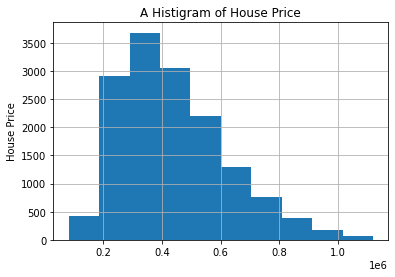

In [858]:
# Plotting a histogram of the price variable
#
plt.figure(figsize = (12,10))
house_price.hist('price')
plt.ylabel('House Price')
plt.title('A Histigram of House Price')
plt.show()


Price variables seem to be skewed to the right.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


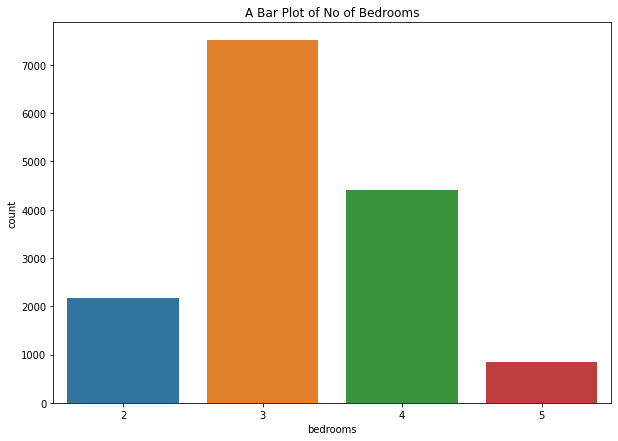

In [859]:
# plotting a bar chat of bedroom variable
# 
plt.figure(figsize =(10, 7))
sns.countplot(house_price.bedrooms)
plt.title('A Bar Plot of No of Bedrooms')
plt.show()

The above bar plot shows that houses with 3 bedrooms are the most followed closely by 4 bedroom houses.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


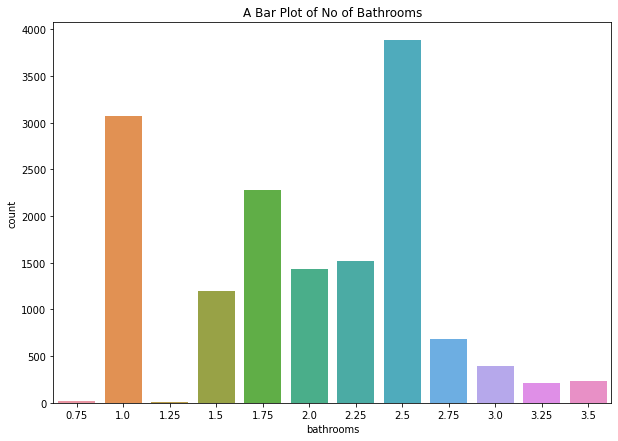

In [860]:
# plotting a bar chat of bathrooms variable
# 
plt.figure(figsize =(10, 7))
sns.countplot(house_price.bathrooms)
plt.title('A Bar Plot of No of Bathrooms')
plt.show()

Most houses have between 1 to 2 bathrooms.




<Figure size 1008x864 with 0 Axes>

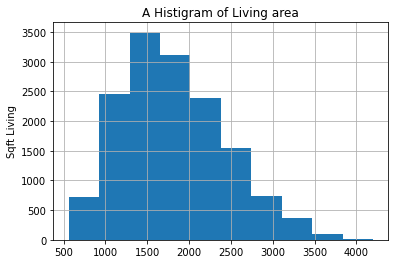

In [861]:
# A a histogram of living area in sqft

plt.figure(figsize =(14, 12))
house_price.hist('sqft_living')
plt.ylabel('Sqft Living')
plt.title('A Histigram of Living area')
plt.show()

We observe that most houses have living area less than 2500 sqft.

<Figure size 1008x864 with 0 Axes>

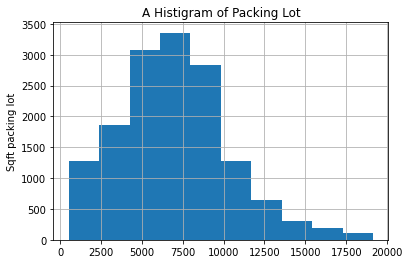

In [862]:
# # A a histogram of living area in sqft
plt.figure(figsize =(14, 12))
house_price.hist('sqft_lot')
plt.ylabel('Sqft packing lot')
plt.title('A Histigram of Packing Lot')
plt.show()

Most of packing lot area are below 2000 sqft.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


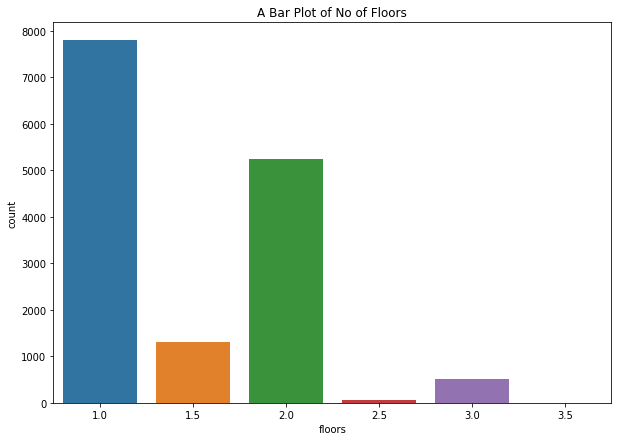

In [863]:
# A bar graph of no of floors
#
plt.figure(figsize =(10, 7))
sns.countplot(house_price.floors)
plt.title('A Bar Plot of No of Floors')
plt.show()

From the above plot most of the houses have betwee 1 and 2 floors.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


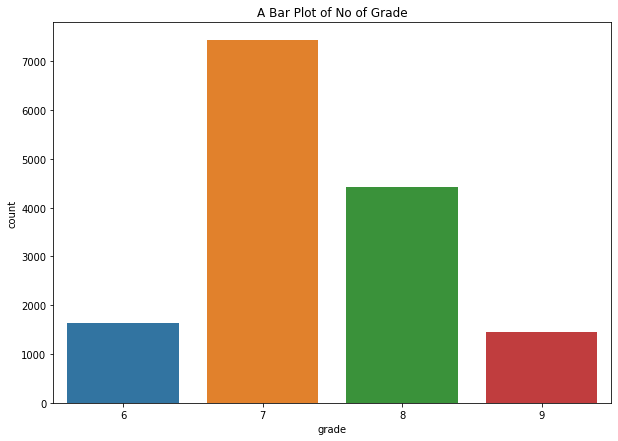

In [864]:
# A bar graph of grade
#
plt.figure(figsize =(10, 7))
sns.countplot(house_price.grade)
plt.title('A Bar Plot of No of Grade')
plt.show()

grade 7 has records of the most houses.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


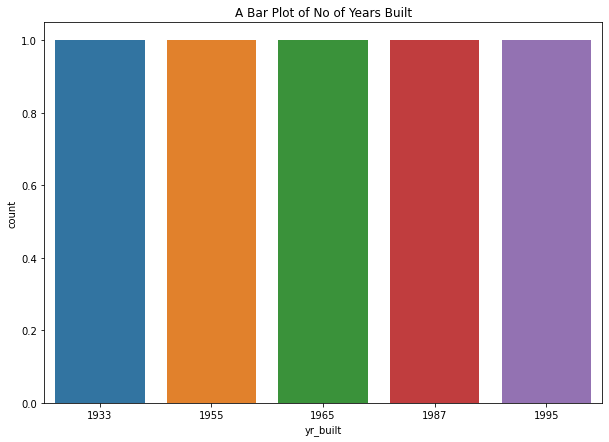

In [865]:
# A bar graph of no of years
#
plt.figure(figsize =(10, 7))
sns.countplot(house_price.yr_built.head())
plt.title('A Bar Plot of No of Years Built')
plt.show()

#b) Bivariate

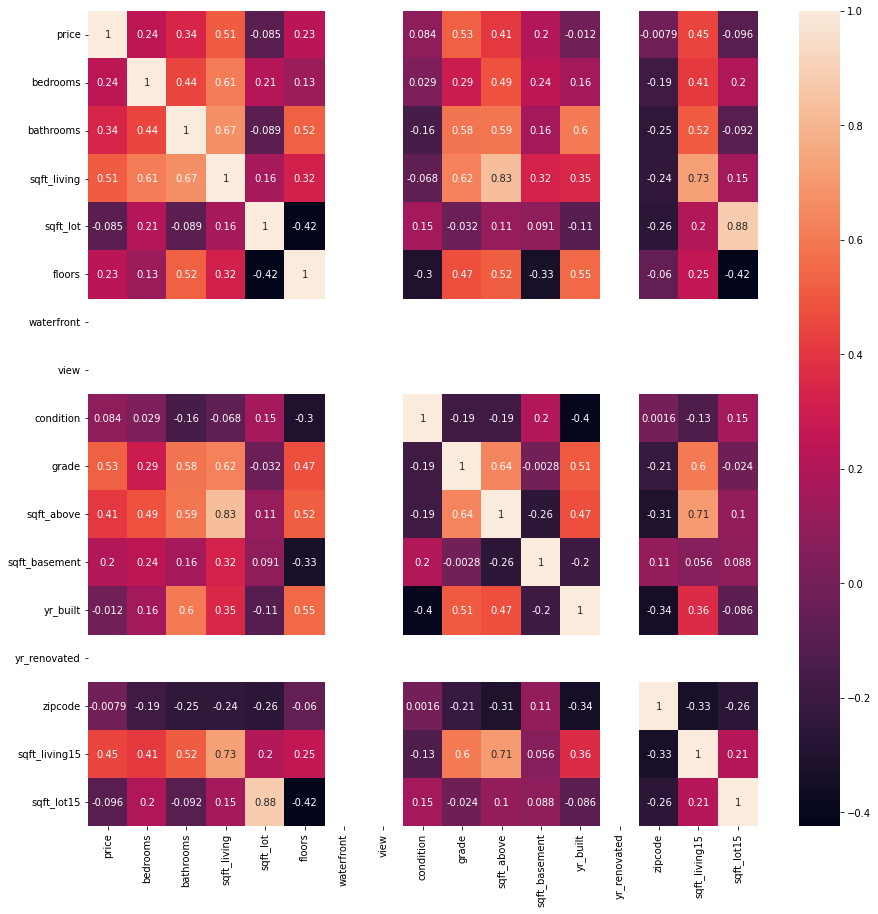

In [866]:
# finding how variables are correlated
plt.figure(figsize=[15, 15])
sns.heatmap(house_price.corr(), annot=True);

water front, year renovated and view are not correlated to any variables. bedroom and bathrooms variable is positively correlated to price , so if there is an increase in number of bedrooms or bathrooms the price increase.

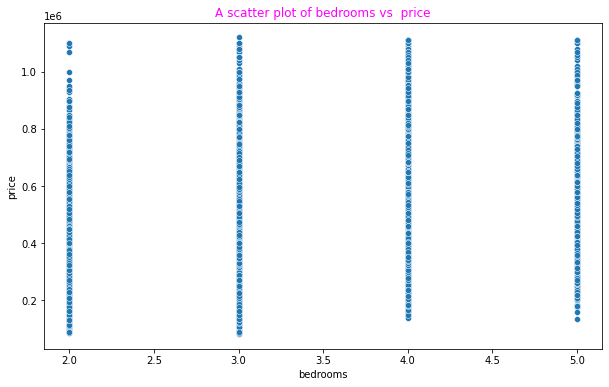

In [867]:
# Plotting a scatter plot of bedrooms vs price
plt.figure(figsize=[10, 6])
sns.scatterplot(x = house_price["bedrooms"], y = house_price["price"])
plt.title("A scatter plot of bedrooms vs  price", color = 'magenta')
plt.show();

The scatter points for 3, 4 and 5 bedrooms are morer populate above price 1.0. This shows taht as the number of bedrooms incresases the price increases.

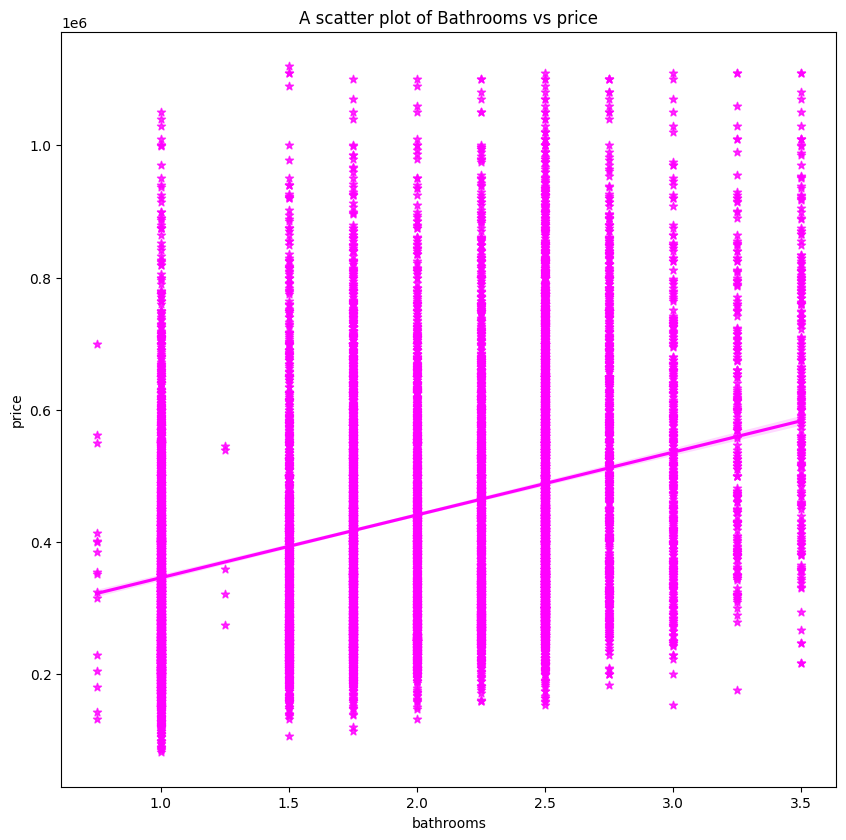

In [868]:
# Plotting a scatter plot of bathrooms vsprice
plt.figure(figsize=[10, 10], dpi = 100)
sns.regplot(x = house_price["bathrooms"], y = house_price["price"], fit_reg=True, color = 'magenta', marker = '*')
plt.title("A scatter plot of Bathrooms vs price", color = 'black')
plt.show();

We observe that as the number of bedrooms increases the scatter points are decreasing at point below 0.2 price showing that the number of bathhrooms also determines what price the house would cost.

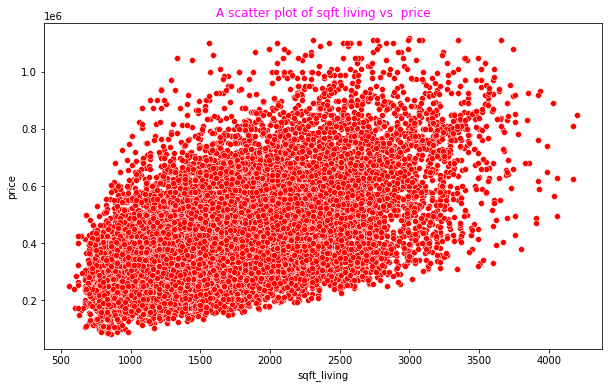

In [869]:
# Plotting a scatter plot of Sft living vs price
plt.figure(figsize=[10, 6])
sns.scatterplot(x = house_price["sqft_living"], y = house_price["price"], color = 'red')
plt.title("A scatter plot of sqft living vs  price", color = 'magenta')
plt.show();

We observe that as the size of the living area increases the the points move to the higher parts of the price.

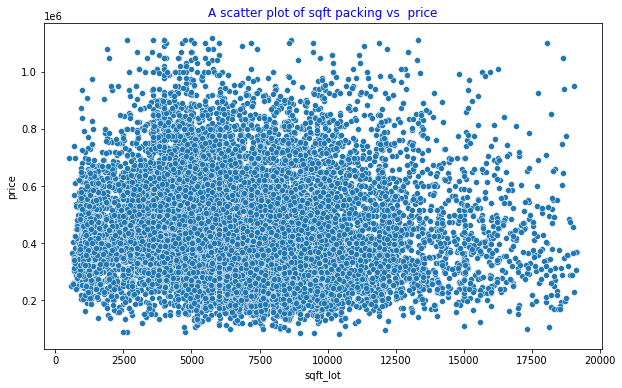

In [870]:
# Plotting a scatter plot of Sqft pqcking vs price
plt.figure(figsize=[10, 6])
sns.scatterplot(x = house_price["sqft_lot"], y = house_price["price"])
plt.title("A scatter plot of sqft packing vs  price", color = 'Blue')
plt.show();

The points of the scatter plot are concetrated at the centre, they don't show any effects in increase of the packing layout lot. 

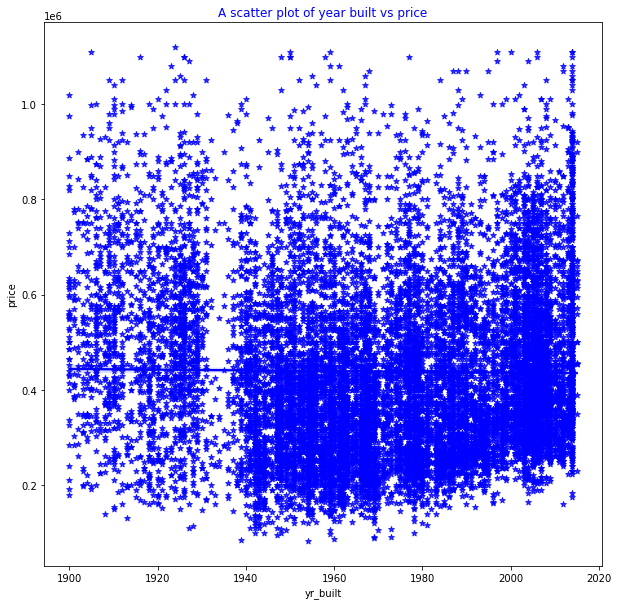

In [871]:
# Plotting a scatter plot of year built vs price
plt.figure(figsize=(10, 10))
sns.regplot(x = house_price["yr_built"], y = house_price["price"], fit_reg=True, color = 'blue', marker = '*')
plt.title("A scatter plot of year built vs price", color = 'blue');

Scatter points are centrally populated, they dont show any effects on the year the house built and the price.

#c) Multivariate

In [872]:
#testing for normality for price
from scipy.stats import shapiro 
stat, p = shapiro(house_price['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
# testing for normality for GDP hrowth

stat, p = shapiro(house_price['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.951, p=0.000
Sample does not look Gaussian
Statistics=0.951, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


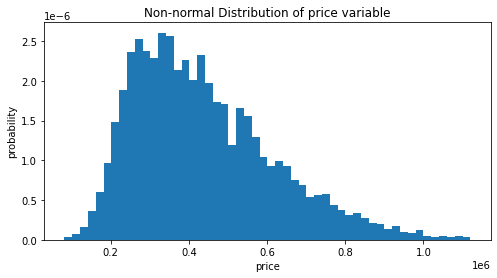

In [873]:
# Correcting not Gaussian
#
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(house_price['price'], bins='auto', density=True)
ax.set_xlabel('price')
ax.set_ylabel('probability')
ax.set_title('Non-normal Distribution of price variable');

In [874]:
#
from scipy import stats
price, lmbda = stats.boxcox(price)

In [875]:
#fitting Gaussian

price.sort()
mean, std = stats.norm.fit(price, loc=0)
pdf_norm = stats.norm.pdf(price, mean, std)

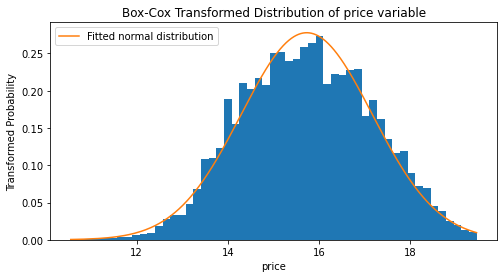

In [876]:
# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(price, bins='auto', density=True)
ax.plot(price, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('price')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution of price variable')
ax.legend();

## 7. Implementing the Solution

While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

Multiple Linear Regression

Quantile Regression

Ridge Regression

Lasso Regression

Elastic Net Regression

#Feature Engineering

In [897]:
# Feature engineering
# looking at how dataset is corellated
house_price.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.239258,0.340714,0.514444,-0.085447,0.227369,NaN,NaN,0.084284,0.527219,0.408100,0.200263,-0.012288,NaN,-0.007908,0.447475,-0.095710
bedrooms,0.239258,1.000000,0.443876,0.614655,0.205066,0.128951,NaN,NaN,0.029081,0.290044,0.485901,0.242161,0.159385,NaN,-0.189663,0.413657,0.196646
bathrooms,0.340714,0.443876,1.000000,0.669328,-0.088627,0.524426,NaN,NaN,-0.157579,0.584326,0.592834,0.155225,0.604054,NaN,-0.250431,0.515188,-0.091637
sqft_living,0.514444,0.614655,0.669328,1.000000,0.164817,0.317400,NaN,NaN,-0.068376,0.622560,0.831444,0.324312,0.351167,NaN,-0.239924,0.727124,0.150084
sqft_lot,-0.085447,0.205066,-0.088627,0.164817,1.000000,-0.416375,NaN,NaN,0.151145,-0.032060,0.114763,0.091374,-0.106820,NaN,-0.257585,0.200479,0.882214
floors,0.227369,0.128951,0.524426,0.317400,-0.416375,1.000000,NaN,NaN,-0.302520,0.472426,0.518479,-0.330496,0.552338,NaN,-0.059929,0.254689,-0.423903
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.084284,0.029081,-0.157579,-0.068376,0.151145,-0.302520,NaN,NaN,1.000000,-0.189084,-0.189186,0.203132,-0.404959,NaN,0.001554,-0.131874,0.153030
grade,0.527219,0.290044,0.584326,0.622560,-0.032060,0.472426,NaN,NaN,-0.189084,1.000000,0.637832,-0.002757,0.509069,NaN,-0.214791,0.603908,-0.023640


In [898]:
# dropping columns with no correlation as they do not have any relationship with our target variable i.e water front, view and year renovated

house_price.drop(['waterfront', 'view', 'yr_renovated'], axis=1, inplace=True)


In [899]:
# confirmin corellation after dropping
#
house_price.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.239258,0.340714,0.514444,-0.085447,0.227369,0.084284,0.527219,0.408100,0.200263,-0.012288,-0.007908,0.447475,-0.095710
bedrooms,0.239258,1.000000,0.443876,0.614655,0.205066,0.128951,0.029081,0.290044,0.485901,0.242161,0.159385,-0.189663,0.413657,0.196646
bathrooms,0.340714,0.443876,1.000000,0.669328,-0.088627,0.524426,-0.157579,0.584326,0.592834,0.155225,0.604054,-0.250431,0.515188,-0.091637
sqft_living,0.514444,0.614655,0.669328,1.000000,0.164817,0.317400,-0.068376,0.622560,0.831444,0.324312,0.351167,-0.239924,0.727124,0.150084
sqft_lot,-0.085447,0.205066,-0.088627,0.164817,1.000000,-0.416375,0.151145,-0.032060,0.114763,0.091374,-0.106820,-0.257585,0.200479,0.882214
floors,0.227369,0.128951,0.524426,0.317400,-0.416375,1.000000,-0.302520,0.472426,0.518479,-0.330496,0.552338,-0.059929,0.254689,-0.423903
condition,0.084284,0.029081,-0.157579,-0.068376,0.151145,-0.302520,1.000000,-0.189084,-0.189186,0.203132,-0.404959,0.001554,-0.131874,0.153030
grade,0.527219,0.290044,0.584326,0.622560,-0.032060,0.472426,-0.189084,1.000000,0.637832,-0.002757,0.509069,-0.214791,0.603908,-0.023640
sqft_above,0.408100,0.485901,0.592834,0.831444,0.114763,0.518479,-0.189186,0.637832,1.000000,-0.255930,0.473681,-0.308017,0.710176,0.101811
sqft_basement,0.200263,0.242161,0.155225,0.324312,0.091374,-0.330496,0.203132,-0.002757,-0.255930,1.000000,-0.195474,0.106974,0.056003,0.087790


In [904]:
# Multicollinearity
#
corr = house_price.drop(['price'], axis=1).corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
bedrooms,1.000000,0.443876,0.614655,0.205066,0.128951,0.029081,0.290044,0.485901,0.242161,0.159385,-0.189663,0.413657,0.196646
bathrooms,0.443876,1.000000,0.669328,-0.088627,0.524426,-0.157579,0.584326,0.592834,0.155225,0.604054,-0.250431,0.515188,-0.091637
sqft_living,0.614655,0.669328,1.000000,0.164817,0.317400,-0.068376,0.622560,0.831444,0.324312,0.351167,-0.239924,0.727124,0.150084
sqft_lot,0.205066,-0.088627,0.164817,1.000000,-0.416375,0.151145,-0.032060,0.114763,0.091374,-0.106820,-0.257585,0.200479,0.882214
floors,0.128951,0.524426,0.317400,-0.416375,1.000000,-0.302520,0.472426,0.518479,-0.330496,0.552338,-0.059929,0.254689,-0.423903
condition,0.029081,-0.157579,-0.068376,0.151145,-0.302520,1.000000,-0.189084,-0.189186,0.203132,-0.404959,0.001554,-0.131874,0.153030
grade,0.290044,0.584326,0.622560,-0.032060,0.472426,-0.189084,1.000000,0.637832,-0.002757,0.509069,-0.214791,0.603908,-0.023640
sqft_above,0.485901,0.592834,0.831444,0.114763,0.518479,-0.189186,0.637832,1.000000,-0.255930,0.473681,-0.308017,0.710176,0.101811
sqft_basement,0.242161,0.155225,0.324312,0.091374,-0.330496,0.203132,-0.002757,-0.255930,1.000000,-0.195474,0.106974,0.056003,0.087790
yr_built,0.159385,0.604054,0.351167,-0.106820,0.552338,-0.404959,0.509069,0.473681,-0.195474,1.000000,-0.343992,0.362912,-0.086017


Pefroming VIF to select features. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others . That means they can be predicted by other variables in the dataset therefore we drop them. Ww will drop variables with VIF exceeding 10.

In [905]:
# Feature selection using VIF
# 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(corr):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = corr.columns
    vif["VIF"] = [variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])]

    return(vif)

calc_vif(corr)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bedrooms,8.648067
1,bathrooms,39.018014
2,sqft_living,inf
3,sqft_lot,82.300377
4,floors,28.060279
5,condition,3.105475
6,grade,18.791950
7,sqft_above,inf
8,sqft_basement,inf
9,yr_built,22.808671


In [906]:
# dropping sqft_lot 15 as it has the highest
#
house_price.drop(['sqft_lot15'], axis=1, inplace=True)
house_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,1340
1,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,2720
2,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,1360
3,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,1800
4,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,98003,2238


In [910]:
# checking the new VIF
#
corr = house_price.drop(['price'], axis=1).corr()
calc_vif(corr)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bedrooms,7.509211
1,sqft_living,inf
2,sqft_lot,5.053554
3,floors,20.877304
4,condition,2.780835
5,grade,16.882822
6,sqft_above,inf
7,sqft_basement,inf
8,yr_built,13.102653
9,zipcode,3.691392


In [909]:
# dropping bathrooms as it has the highest VIF
#
house_price.drop(['bathrooms'], axis=1, inplace=True)
house_price.head()

KeyError: ignored

In [912]:
# checking the new VIF
#
corr = house_price.drop(['price'], axis=1).corr()
calc_vif(corr)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bedrooms,7.509211
1,sqft_living,inf
2,sqft_lot,5.053554
3,floors,20.877304
4,condition,2.780835
5,grade,16.882822
6,sqft_above,inf
7,sqft_basement,inf
8,yr_built,13.102653
9,zipcode,3.691392


In [913]:
# dropping sqft_living as it has the highest VIF
#
house_price.drop(['sqft_living15'], axis=1, inplace=True)
house_price.head()

,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,221900.0,3,1180,5650,1.0,3,7,1180,0,1955,98178
1,180000.0,2,770,10000,1.0,3,6,770,0,1933,98028
2,604000.0,4,1960,5000,1.0,5,7,1050,910,1965,98136
3,510000.0,3,1680,8080,1.0,3,8,1680,0,1987,98074
4,257500.0,3,1715,6819,2.0,3,7,1715,0,1995,98003


In [914]:
# checking the new VIF
#
corr = house_price.drop(['price'], axis=1).corr()
calc_vif(corr)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bedrooms,6.756178
1,sqft_living,inf
2,sqft_lot,4.951401
3,floors,19.375997
4,condition,2.684863
5,grade,13.336139
6,sqft_above,inf
7,sqft_basement,inf
8,yr_built,12.382473
9,zipcode,3.245700


In [916]:
# dropping floors as it has the highest VIF
#
house_price.drop(['floors'], axis=1, inplace=True)
house_price.head()

,price,bedrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,221900.0,3,1180,5650,3,7,1180,0,1955,98178
1,180000.0,2,770,10000,3,6,770,0,1933,98028
2,604000.0,4,1960,5000,5,7,1050,910,1965,98136
3,510000.0,3,1680,8080,3,8,1680,0,1987,98074
4,257500.0,3,1715,6819,3,7,1715,0,1995,98003


In [917]:
# checking the new VIF
#
corr = house_price.drop(['price'], axis=1).corr()
calc_vif(corr)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bedrooms,6.666337
1,sqft_living,inf
2,sqft_lot,1.989209
3,condition,2.524146
4,grade,12.044375
5,sqft_above,inf
6,sqft_basement,inf
7,yr_built,8.449030
8,zipcode,3.040329


In [918]:
# dropping grade as it has the highest VIF
#
house_price.drop(['grade'], axis=1, inplace=True)
house_price.head()

,price,bedrooms,sqft_living,sqft_lot,condition,sqft_above,sqft_basement,yr_built,zipcode
0,221900.0,3,1180,5650,3,1180,0,1955,98178
1,180000.0,2,770,10000,3,770,0,1933,98028
2,604000.0,4,1960,5000,5,1050,910,1965,98136
3,510000.0,3,1680,8080,3,1680,0,1987,98074
4,257500.0,3,1715,6819,3,1715,0,1995,98003


In [919]:
# checking the new VIF
#
corr = house_price.drop(['price'], axis=1).corr()
calc_vif(corr)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,bedrooms,5.909503
1,sqft_living,inf
2,sqft_lot,1.935782
3,condition,2.450298
4,sqft_above,inf
5,sqft_basement,inf
6,yr_built,6.213959
7,zipcode,2.935355


#Multicollinearity

In [920]:
# finding the vactor inflation variancae VIF
#
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

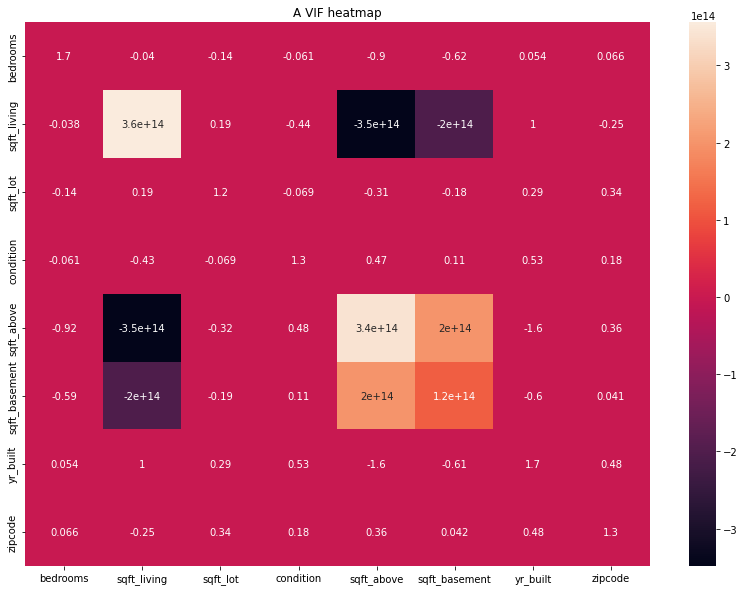

In [921]:
# Plotting vif heat map
#
plt.figure(figsize=(14,10))
sns.heatmap(vif, annot=True)
plt.title('A VIF heatmap')
plt.show()

# Normalization

In [922]:
# Normalization 
#
from sklearn import preprocessing

names = house_price.columns
df = preprocessing.normalize(house_price)
scaled_df = pd.DataFrame(df, columns=names)
scaled_df.head()

,price,bedrooms,sqft_living,sqft_lot,condition,sqft_above,sqft_basement,yr_built,zipcode
0,0.914191,0.000012,0.004861,0.023277,0.000012,0.004861,0.000000,0.008054,0.404477
1,0.877116,0.000010,0.003752,0.048729,0.000015,0.003752,0.000000,0.009419,0.477677
2,0.987011,0.000007,0.003203,0.008171,0.000008,0.001716,0.001487,0.003211,0.160366
3,0.981871,0.000006,0.003234,0.015556,0.000006,0.003234,0.000000,0.003825,0.188816
4,0.934252,0.000011,0.006222,0.024740,0.000011,0.006222,0.000000,0.007238,0.355571


In [923]:
# Selecting X and y variables
#
X = np.array(scaled_df.drop(['price'], axis=1))
y = scaled_df['price']

print(X.shape)
print(y.shape)

(14929, 8)
(14929,)


In [924]:
# splitting the variables
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#1) Multiple Linear Regression

In [925]:
# Fitting Multiple Linear Regression into the dataset
#
from sklearn.linear_model import LinearRegression

MLR = LinearRegression()
MLR.fit(X_train, y_train)

LinearRegression()

In [926]:
# Determining the shape of data
#
print(y_train.shape)
print(X_train.shape)

(11943,)
(11943, 8)


In [ ]:
#Intercept and Coefficient
#
print("Intercept: ", MLR.intercept_)
print("Coefficients:")
list(zip(X, MLR.coef_))

In [927]:
#Prediction of test set
#
y_pred= MLR.predict(X_test)

#Actual value and the predicted value
#
pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred}).head()



,Actual value,Predicted value
5717,0.954698,0.950651
14689,0.904669,0.912274
431,0.974419,0.972425
3487,0.991530,1.001460
13506,0.981985,0.983372


In [ ]:
# Evaluationing the accuracy of the model
#
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
SMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(MLR.score(X,y)*100))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', SMSE)

R Square is the coefficient of determination. It tells us how many points fall on the regression line.Therefore our model performed well with 92.99% of our data fit in the linear regression model.

The lower the MAE(0.005) value, the better is the model’s performance hence our model is perfector predictor.

The lower the MSE value, the better is the model’s performance our model perfomed with as 7.37 MSE.

ALso RMSE performs better when the values is less and our model had 0.0085 RMSE making the model better.


In [928]:
# cross validating the model
#

from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

X = np.array(scaled_df.drop(['price'], axis=1))
y = scaled_df['price']

#defining the KFolds
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  
 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 14929 folds
trained 14929 models


0.005379795558036575

-0.005340125085781744


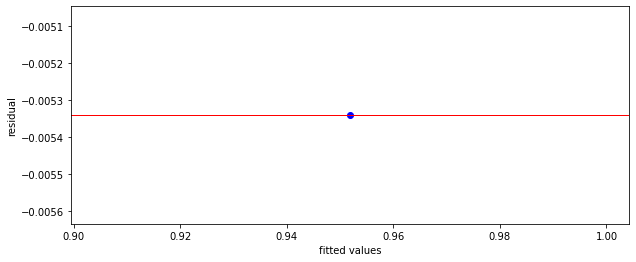

In [929]:
# Residual plots

# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Describing 
pd.DataFrame(residuals).describe()

print(residuals.mean())
# residual plot

plt.figure(figsize=(10,4))
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [930]:
# heterostekadacity

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# computing a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


#2) Quantile Regression

In [931]:
# Selecting X and y variables
#
Xq = house_price.drop(['price'], axis=1)
yq = house_price['price']

In [932]:
# statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#

mod = smf.quantreg('yq ~ Xq ', scaled_df)
res = mod.fit(q=0.5)
print(res.summary())

ValueError: ignored

In [933]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

ValueError: ignored

#3) Ridge Regression

In [934]:
# Fitting Multiple Linear Regression into the dataset
#
from sklearn.linear_model import Ridge


Ridge= Ridge(alpha = 0.01)
Ridge.fit(X_train, y_train)
R_pred = Ridge.predict(X_test)
print(R_pred)

[0.95064466]


In [935]:
#Actual value and the predicted value
#
pd.DataFrame({'Actual value': y_test, 'Predicted value': R_pred}).head()

,Actual value,Predicted value
14928,0.957272,0.950645


In [936]:
# Creating our baseline regression model
# 
regression = LinearRegression()
regression.fit(X_train,y_train)
Reg_pred = regression.predict(X_test)
print(Reg_pred)

[0.95193229]


In [937]:
# Evaluationing the accuracy of the Ridge model
#
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, R_pred)
MSE = metrics.mean_squared_error(y_test, R_pred)
SMSE = np.sqrt(metrics.mean_squared_error(y_test, R_pred))

print('Ridge R squared: {:.2f}'.format(Ridge.score(X,y)*100))

MAE = metrics.mean_absolute_error(y_test, Reg_pred)
MSE = metrics.mean_squared_error(y_test, Reg_pred)
SMSE = np.sqrt(metrics.mean_squared_error(y_test, Reg_pred))
print('Linear R squared: {:.2f}'.format(regression.score(X,y)*100))


Ridge R squared: 92.97
Linear R squared: 93.12


Ridge reggresion at alpha = 0.5 Has a Raquared of 92.79% making it a better model however is 0.21% less from the base model.

In [938]:
# cross validating the model
#

from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

X = np.array(scaled_df.drop(['price'], axis=1))
y = scaled_df['price']

#defining the KFolds
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  
 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  from sklearn.linear_model import Ridge
  ridge= Ridge()
  ridge.fit(X_train, y_train)
  
  
  # assess the accuraccy of the model
  R_pred = ridge.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, R_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 14929 folds
trained 14929 models


0.005482303023762272

-0.005974842444255168


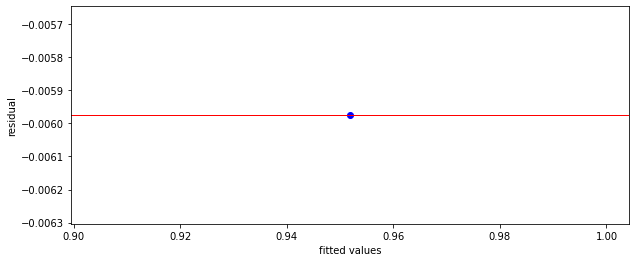

In [939]:
# Residual plots

# value for each row in our dataset

residuals = np.subtract(R_pred, y_test)

# Describing 
pd.DataFrame(residuals).describe()

print(residuals.mean())
# residual plot

plt.figure(figsize=(10,4))
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [940]:
# heterostekadacity

import scipy as sp

test_result, p_value = sp.stats.bartlett(R_pred, residuals)

# computing a critical value of the chi squared distribution
degree_of_freedom = len(R_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


#4) Lasso Regression

In [941]:
# Fitting Lasso Regression
#
from sklearn.linear_model import Lasso

# Creating lasso regression with alpha value
regr = Lasso(alpha=0.0001)
model = regr.fit(X_train, y_train)
L_pred = regr.predict(X_test)
print(L_pred)

[0.95069962]


In [ ]:
# Evaluationing the accuracy of the Ridge model
#
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, L_pred)
MSE = metrics.mean_squared_error(y_test, L_pred)
SMSE = np.sqrt(metrics.mean_squared_error(y_test, L_pred))


print('Lasso R squared: {:.2f}'.format(regr.score(X,y)*100))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', SMSE)


In [942]:
# cross validating the model
#
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

X = np.array(scaled_df.drop(['price'], axis=1))
y = scaled_df['price']

#defining the KFolds
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  
 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  from sklearn.linear_model import Lasso
  regr = Lasso(alpha=0.5)
  model = regr.fit(X_train, y_train)

  
  
  # assess the accuraccy of the model
  L_pred = regr.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, L_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 14929 folds
trained 14929 models


0.022829533918779944

0.00500135521727052


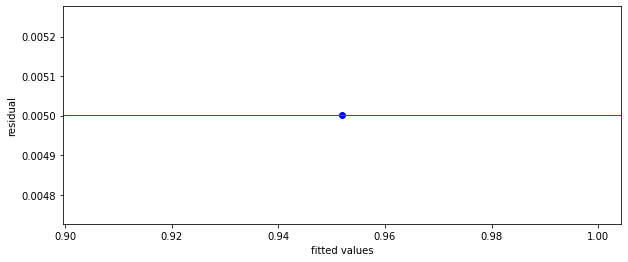

In [943]:
# Residual plots

# value for each row in our dataset

residuals = np.subtract(L_pred, y_test)

# Describing 
pd.DataFrame(residuals).describe()

print(residuals.mean())
# residual plot

plt.figure(figsize=(10,4))
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [944]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(L_pred, residuals)

# computing a critical value of the chi squared distribution
degree_of_freedom = len(L_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


#5)Elastic Net Regression

In [945]:
# Fitting Lasso Regression
#
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha = 0.001, l1_ratio = 0.02)
elastic.fit(X_train,y_train)
E_pred = elastic.predict(X_test)
print(E_pred)

[0.95170305]


In [946]:
#Actual value and the predicted value
#
pd.DataFrame({'Actual value': y_test, 'Predicted value': E_pred}).head()

,Actual value,Predicted value
14928,0.957272,0.951703


In [947]:
# Evaluationing the accuracy of the Ridge model
#
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, E_pred)
MSE = metrics.mean_squared_error(y_test, E_pred)
SMSE = np.sqrt(metrics.mean_squared_error(y_test, E_pred))


print('Lasso R squared: {:.2f}'.format(elastic.score(X,y)*100))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', SMSE)


Lasso R squared: 91.79
Mean Absolute Error: 0.0055693699241728956
Mean Square Error: 3.101788135228161e-05
Root Mean Square Error: 0.0055693699241728956


In [948]:
# cross validating the model
#
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

X = np.array(scaled_df.drop(['price'], axis=1))
y = scaled_df['price']

#defining the KFolds
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] 
count = 0  
for train_index, test_index in folds.split(X):
  
 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  from sklearn.linear_model import ElasticNet
  elastic = ElasticNet()
  elastic.fit(X_train, y_train)

  
  
  # assess the accuraccy of the model
  E_pred = elastic.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, E_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 14929 folds
trained 14929 models


0.022829533918779944

0.00500135521727052


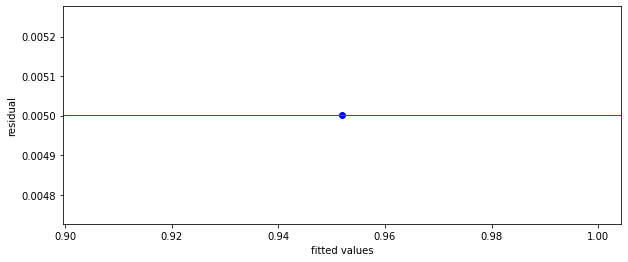

In [949]:
# Residual plots

# value for each row in our dataset

residuals = np.subtract(E_pred, y_test)

# Describing 
pd.DataFrame(residuals).describe()

print(residuals.mean())
# residual plot

plt.figure(figsize=(10,4))
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [950]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(E_pred, residuals)

# computing a critical value of the chi squared distribution
degree_of_freedom = len(E_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

the variances are homogeneous!


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


0.00500135521727052


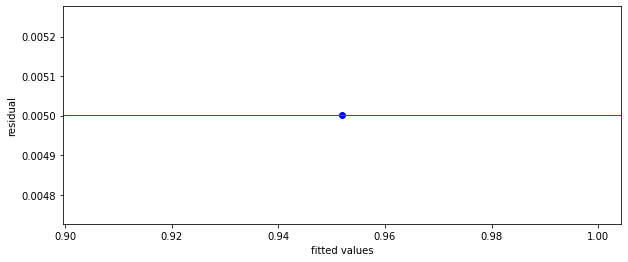

In [951]:
# Residual plots

# value for each row in our dataset

residuals = np.subtract(L_pred, y_test)

# Describing 
pd.DataFrame(residuals).describe()

print(residuals.mean())
# residual plot

plt.figure(figsize=(10,4))
plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

## 8. Challenging the solution

In [953]:
# Reviewing the Solution 
#1. Explained variance
from sklearn.metrics import explained_variance_score as evs

print('Expalined Variance')
print('Explained Variance Score of MLR model is {}'.format(evs(y_test, y_pred)))
print(' ')
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, R_pred)))
print(' ')
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, L_pred)))
print(' ')
#print(cl('Explained Variance Score of Quantile model is {}'.format(evs(y_test, Q_pred)), attrs = ['bold']))
print(' ')
print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, E_pred)))
print(' ')



Expalined Variance
Explained Variance Score of MLR model is 1.0
 
Explained Variance Score of Ridge model is 1.0
 
Explained Variance Score of Lasso model is 1.0
 
 
Explained Variance Score of ElasticNet is 1.0
 


# Conclusion




The models used have have a explained variance of 1 making them accurate for price prediction.